# Game of Thrones isAlive Prediction

## Description of the data

* **name**: Name of the character

* **Title**: Social status or nobility

* **House**: House to which the character belongs

* **Culture**: Social group to which the character belongs

* **book1/2/3/4/5**: Character's appearance in the book

* **Is noble**: Nobility of the character, based on their title

* **Age**: Time reference: 305 AC

* **male**: Male or female

* **dateOfBirth**: Date of birth

* **Spouse**: Name of the character’s spouse

* **Father**: Name of the character’s father

* **Mother**: Name of the character’s mother

* **Heir**: Name of the character’s heir

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Represents whether character's mother is alive

* **Is heir alive:** Represents whether character's heir is alive

* **Is father alive:** Represents whether character's father is alive

* **Number dead relations:** Number of deceased characters associated with the character
* **Popularity score:** Number of internal incoming and outgoing links to the character’s page on the wiki http://awoiaf.westeros.org

Target variable:
* **isAlive**:  Whether the character is alive in the book

## Part 1. Analysis and preprocessing of data

* Data Preprocessing
  * Handling missing data
  * Creating new features
  * Removing unnecessary columns

* Data Analysis

  * Target variable analysis
  * Feature analysis
  * Analysis of the impact of features on the target variable

* Data Preparation for Model Training

Loading the dataset

In [ ]:
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 33.2MB/s]


Importing numpy, pandas, seaborn, matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a Pandas DataFrame using the `read_csv` function. Instead of the default row names `0,1,...,` use the `index_col` parameter to set the values of the `S.No` column as row names.

In [ ]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data.sample(10)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1186,Lymond Vikary,Ser,1,NaN,NaN,NaN,NaN,NaN,House Vikary,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.026756,1
645,Jon Cupps,Ser,1,NaN,NaN,NaN,NaN,NaN,House Cupps,Leyla Hightower,...,NaN,NaN,NaN,1.0,1,1,NaN,0,0.050167,1
741,Maggy,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.056856,1
1160,Leo Lefford,Golden Tooth,1,NaN,NaN,NaN,NaN,NaN,House Lefford,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.056856,0
779,Michael Mertyns,Ser,1,NaN,NaN,NaN,NaN,NaN,House Mertyns,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,1
1527,Jeyne Lothston,NaN,0,NaN,164.0,NaN,NaN,NaN,House Lothston,NaN,...,NaN,NaN,NaN,NaN,0,0,100.0,0,0.023411,0
919,Lord Ashford,Ashford,1,Reach,NaN,NaN,NaN,NaN,House Ashford,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.010033,1
57,Quence,NaN,0,Braavosi,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.020067,1
1028,Eon Hunter,Longbow Hall,1,NaN,NaN,NaN,NaN,NaN,House Hunter,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.046823,0


Data preprocessing and NaN detection

In [ ]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [ ]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data.drop(columns=['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'spouse', 'isAliveSpouse'], inplace=True)
# Dropping non-informative columns with too many NaN values

Now let's handle the NaN:

In [ ]:
# For 'Title' column we replace NaN values with a new one
data['title'] = data['title'].fillna('loser')

# Then all the rare titles are going to be combined into new value 'rare'
data.loc[data['title'].value_counts()[data['title']].values < 30, 'title'] = "rare"

# Same approach for 'Home'
data['house'] = data['house'].fillna('homeless')
data.loc[data['house'].value_counts()[data['house']].values < 30, 'house'] = "rare"

# Culture, age and dateOfBirth we'll just replace with mode
data['culture'].fillna(data['culture'].mode()[0], inplace=True)

# Numerical values we'll fill with 0
data['age'].fillna(0, inplace=True)
data['dateOfBirth'].fillna(0, inplace=True)

<ipython-input-124-22dc5cd3cb06>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['culture'].fillna(data['culture'].mode()[0], inplace=True)
<ipython-input-124-22dc5cd3cb06>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

Now let's create new features:

In [ ]:
# Bool column 'isPopular', showing is the character popular or not, threshold is 0.5
data['isPopular'] = data['popularity'] > 0.5
data['isPopular'] = data['isPopular'].astype(int)

In [ ]:
# Same approach for 'numDeadRelations'
data['boolDeadRelations'] = data['numDeadRelations'] > 0
data['boolDeadRelations'] = data['boolDeadRelations'].astype(int)

In [ ]:
# Getting rid of old features
data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)

Let's also unify the `Culture` column, merging similar values under single one:

In [ ]:
# Dictionary with deciphering
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# String expression for replacement
cult_map = {v: k for k, values in cult.items() for v in values}
data['culture'] = data['culture'].replace(cult_map)

Also, it's better to numerically encode categorial features:

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['culture'] = label_encoder.fit_transform(data['culture'])
data['house'] = label_encoder.fit_transform(data['house'])
data['title'] = label_encoder.fit_transform(data['title'])

Now let's take a look at the target variable:

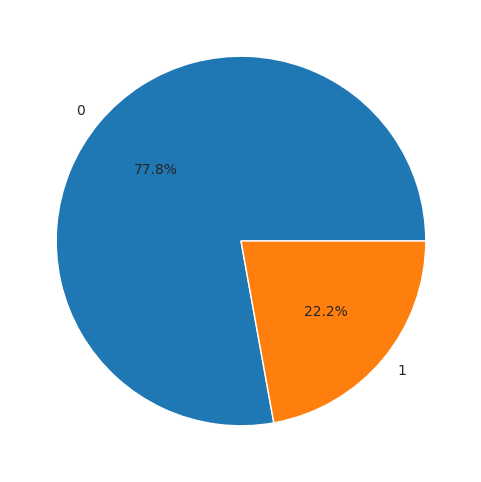

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data['isAlive'].value_counts(), labels=[0, 1], autopct='%1.1f%%')
plt.show()

We can see that it's disbalanced, but not enough to apply relatable techniques,
like over/undersampling, model ensembling or class weighting

Here we're evaluating the correlation between features:

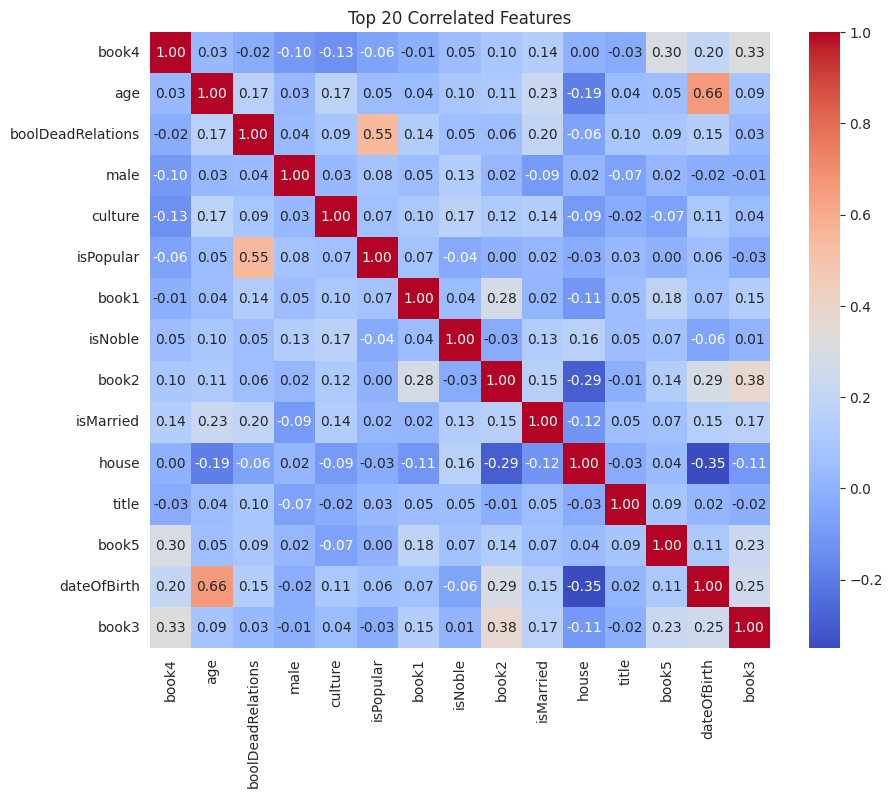

In [ ]:
corr_matrix = data.corr()

top_n = 20
top_features = corr_matrix['isAlive'].abs().sort_values(ascending=False).index[1:top_n + 1]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Top {top_n} Correlated Features')
plt.show()

#

And here their influence on target value:

In [ ]:
correlation = data.corr()['isAlive'].sort_values(ascending=False)
print(correlation)

isAlive              1.000000
book4                0.284014
house                0.040786
book5                0.032531
book3                0.018427
dateOfBirth         -0.027024
title               -0.036035
isMarried           -0.049381
book2               -0.055998
isNoble             -0.060572
book1               -0.112468
isPopular           -0.118673
culture             -0.132554
male                -0.148290
boolDeadRelations   -0.178177
age                 -0.181938
Name: isAlive, dtype: float64


From two bullets above we can imply that:
* `dateOfBirth` has strong influence on `isAlive`
* `age` and `dateOfBirth` are quite strongly correlated
* other variables influence target column way less

Thus, it may be valuable to:
* make a new feature, combined of those 2
* remove unnecessary features

Let's start from the new column `alive_age_date`:

In [ ]:
data['alive_age_date'] = (data['dateOfBirth'] + data['age']) > 304.9
data['alive_age_date'] = data['alive_age_date'].astype(int)
#because the current year according to the data description is 305

Now let's drop irrelevant features:

In [ ]:
data = data.drop(columns=['title', 'male', 'culture', 'house', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isMarried', 'isNoble',
       'isPopular', 'boolDeadRelations'])

Aesthetical changes:

In [ ]:
data = data.reindex(columns=['dateOfBirth', 'age', 'alive_age_date', 'isAlive'])

Now, the final DataFrame looks like:

In [ ]:
data.sample(5)

,dateOfBirth,age,alive_age_date,isAlive
S.No,,,,
550,0.0,0.0,0,1
310,0.0,0.0,0,1
1109,230.0,75.0,1,1
738,0.0,0.0,0,1
761,0.0,0.0,0,1


## Part 2. Model building and evaluation


In order to find the best model, let's try various popular models:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

First, let's define feature tensor and target column:

In [ ]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

Then make the train/test split in ratio 80:20

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Now let's build, train and evaluate prediction of models:

In [ ]:
model_accuracies = {}

In [ ]:
# Building the model
logistic_regression = LogisticRegression(C=1)

# Training the model
logistic_regression.fit(X_train, y_train)

# Model predition
y_pred_lr = logistic_regression.predict(X_test)

# Performance evaluation through accuracy:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
model_accuracies['Logistic Regression'] = accuracy_lr
print("Accuracy : %.4f" % accuracy_lr)

Accuracy : 0.8365


In [ ]:
# AdaBoost Classifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
model_accuracies['AdaBoost'] = accuracy_ab
print("Accuracy : %.4f" % accuracy_ab)

Accuracy : 0.8397


In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = accuracy_rf
print("Accuracy : %.4f" % accuracy_rf)

Accuracy : 0.8397


In [ ]:
# Gaussian Process Classifier
gaussian_process = GaussianProcessClassifier()
gaussian_process.fit(X_train, y_train)
y_pred_gp = gaussian_process.predict(X_test)
accuracy_gp = accuracy_score(y_test, y_pred_gp)
model_accuracies['Gaussian Process'] = accuracy_gp
print("Accuracy : %.4f" % accuracy_gp)

Accuracy : 0.8397


In [ ]:
# Naive Bayes (GaussianNB)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
model_accuracies['Naive Bayes'] = accuracy_nb
print("Accuracy : %.4f" % accuracy_nb)

Accuracy : 0.3526


In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
model_accuracies['K-Nearest Neighbors'] = accuracy_knn
print("Accuracy : %.4f" % accuracy_knn)

Accuracy : 0.3462


In [ ]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
model_accuracies['Support Vector Classifier'] = accuracy_svc
print("Accuracy : %.4f" % accuracy_svc)

Accuracy : 0.8237


In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
model_accuracies['Decision Tree'] = accuracy_dt
print("Accuracy : %.4f" % accuracy_dt)

Accuracy : 0.8397


Now, let's finally present the best model and its performance:

In [ ]:
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]
print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}")

The best model is AdaBoost with an accuracy of 0.8397


Final accuracy is `0.8397`, which is good, because most likely the model is able to make precise predictions and not overfitted at the same time.

